In [1]:
from PIL import Image
import hdbscan
import time
import seaborn as sns
import joblib
import numpy as np
import pandas as pd
from umap import UMAP
from image_helpers import *
from tsne import image_scatter_plot
from sklearn.linear_model import LogisticRegression


import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_context("poster")
%pylab inline

import warnings
warnings.filterwarnings('ignore')
pylab.rcParams['figure.figsize'] = (15, 15)

Populating the interactive namespace from numpy and matplotlib


In [2]:
data, paths, encodings, arrays_rescaled, X = load_encodings('../data/friends_and_myself_pics_faces_encodings.pickle')

count    49.000000
mean      0.657795
std       0.247970
min       0.127263
25%       0.397834
50%       0.750633
75%       0.847171
max       0.957851
dtype: float64
skew --  -0.5954925417900085
kurtosis -- -0.9936233255500113


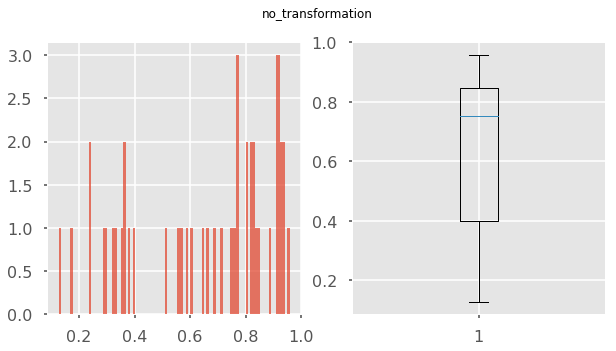

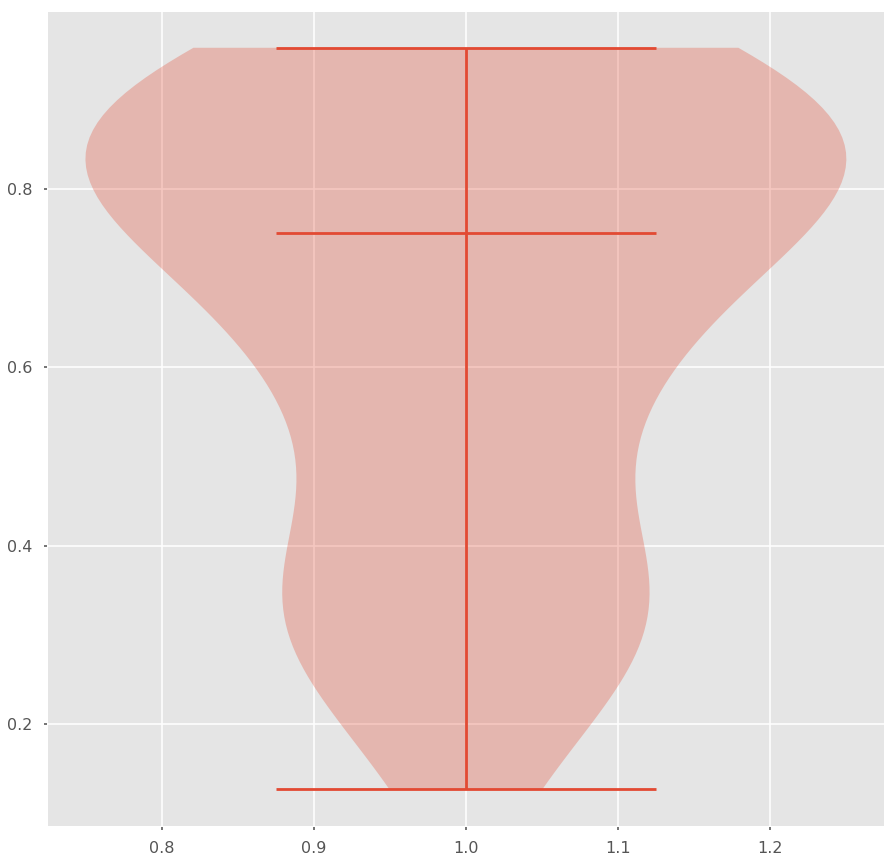

In [3]:
lr = joblib.load('xgb_tinderlikes.joblib')
probas = pd.Series(lr.predict_proba(encodings)[:,1])
plot_distribution(probas)

In [4]:
num_of_bins = 5
sorted_imgs = sorted(zip(probas, arrays_rescaled), key=lambda x: x[0], reverse=True)
sorted_arrays_rescaled  = [img[1] for img in sorted_imgs]
sorted_probas = [img[0] for img in sorted_imgs]

bin_bounds = list(map(lambda x: x/100, list(range(0,100, int(100/num_of_bins)))))
bin_labels = pd.cut(sorted_probas, bins=bin_bounds, labels=list(range(1, num_of_bins )))


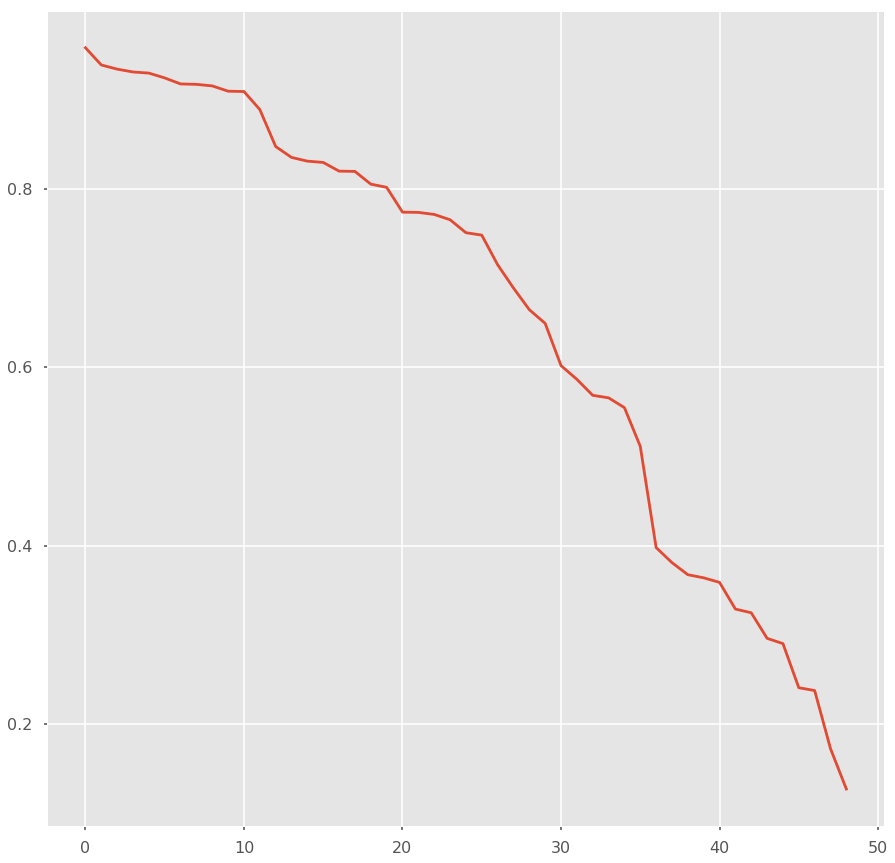

In [10]:
plt.plot(list(range(len(sorted_probas))), sorted_probas)

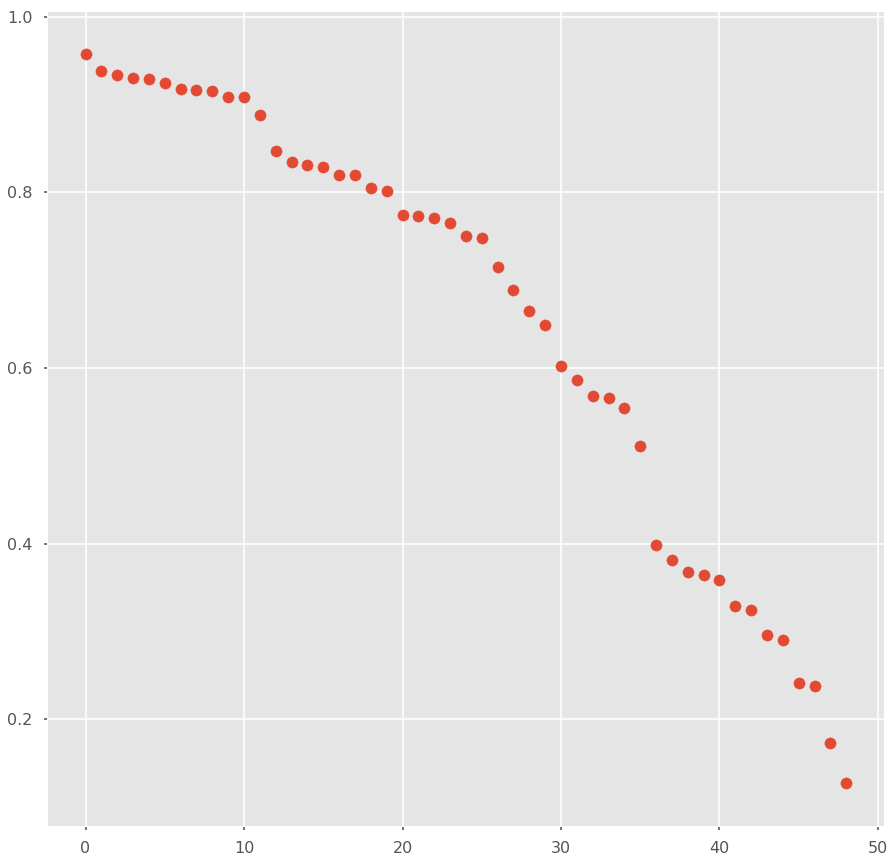

In [11]:
plt.scatter(list(range(len(sorted_probas))), sorted_probas)

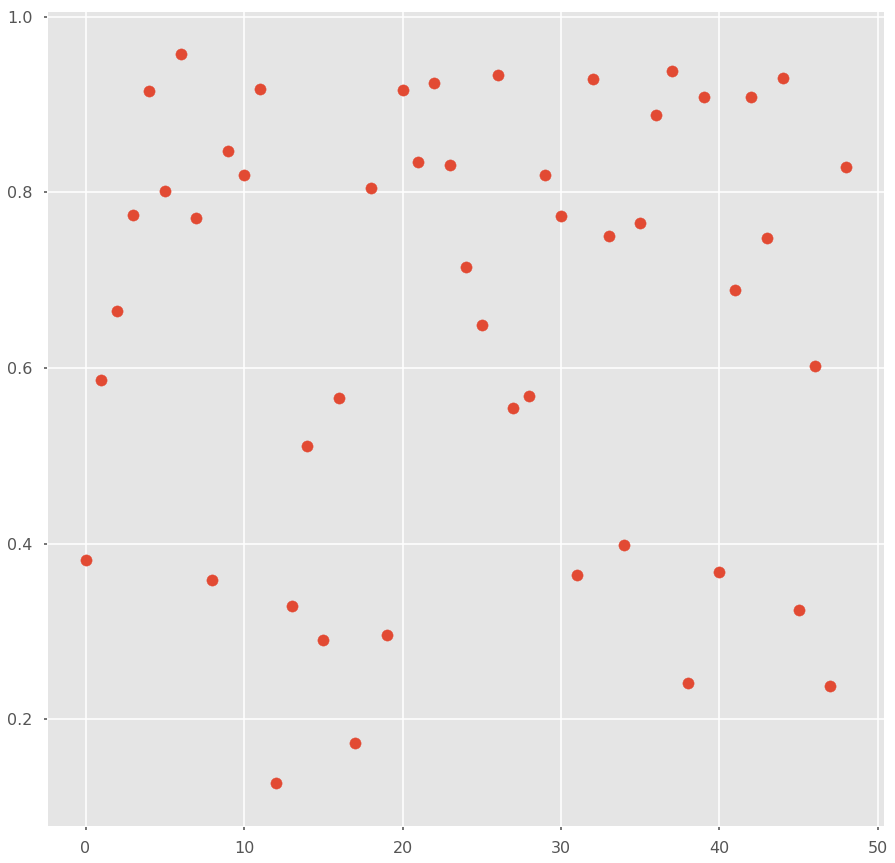

In [12]:
plt.scatter(list(range(len(probas))), probas)

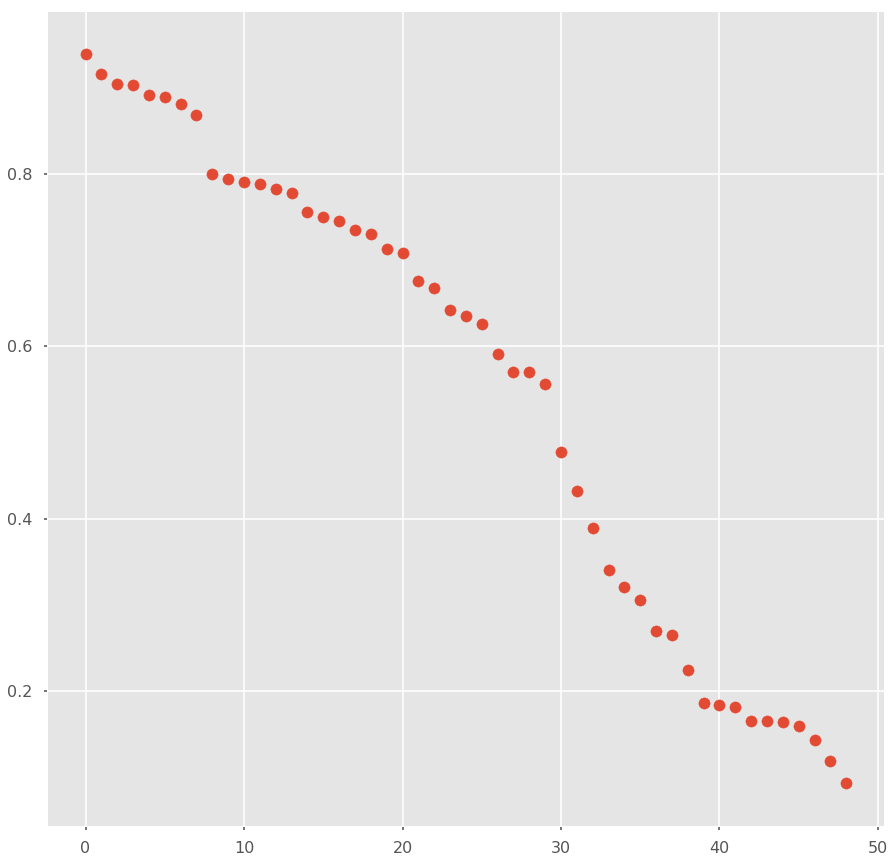

In [16]:
lr = joblib.load('xgb_unbalanced_tinderlikes.joblib')
probas_ = pd.Series(lr.predict_proba(encodings)[:,1])
sorted_probas_ = sorted(probas_, reverse=True)
plt.scatter(list(range(len(sorted_probas_))), sorted_probas_)

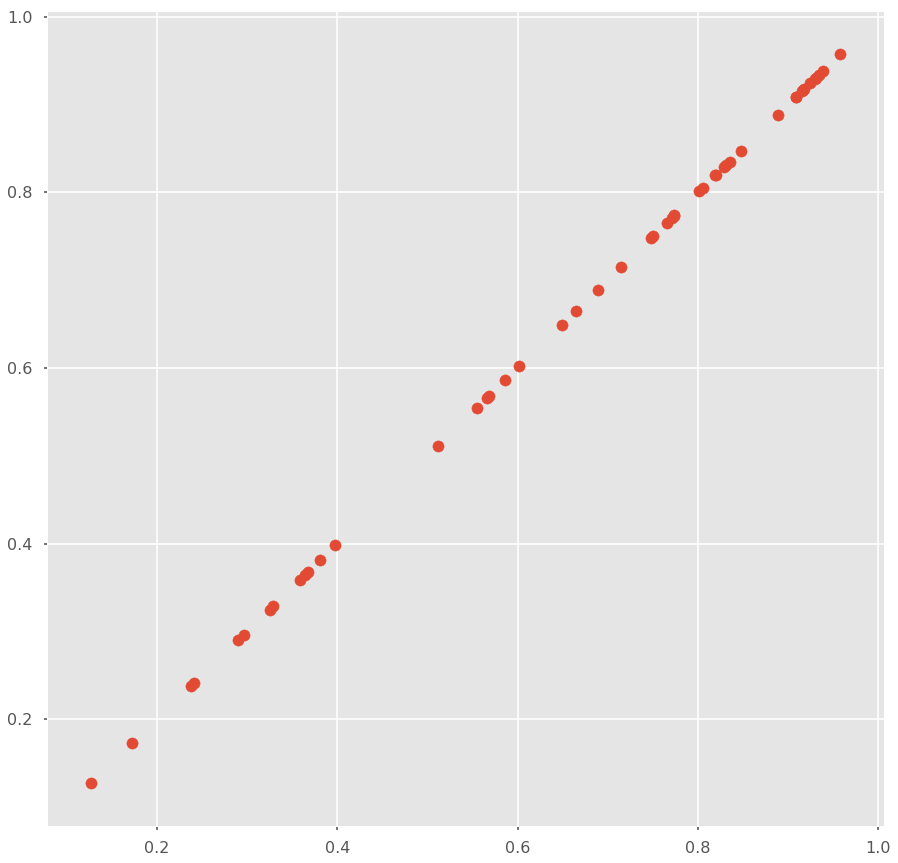

In [18]:
plt.scatter(probas, probas)

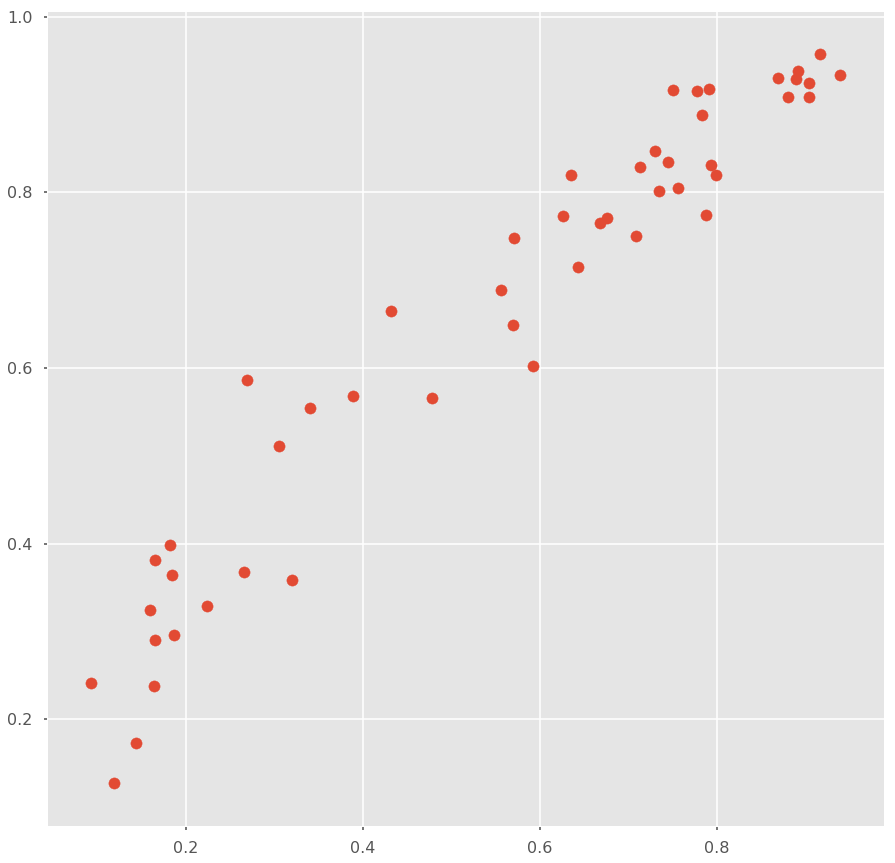

In [17]:
plt.scatter(probas_, probas)